<a href="https://colab.research.google.com/github/taylan-sen/CIS490b_computer_vision/blob/main/CV_parallax_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this assignment, we will learn the math behind virtual 3d displays using parallax with facetracking


***Your mission, should you choose to accept it, is to create a virtual reality 3D window implementing parallax shift through face tracking...***  
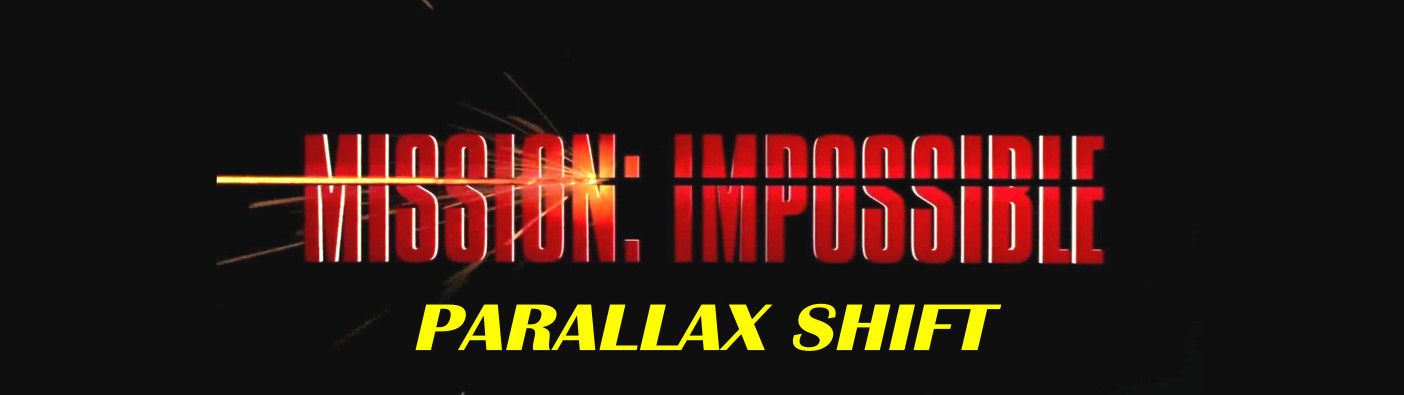

## Background
Importance of parallax in projecting an image for a user at a specific location is demonstrated in this scene in Mission Impossible Ghost Protocol:


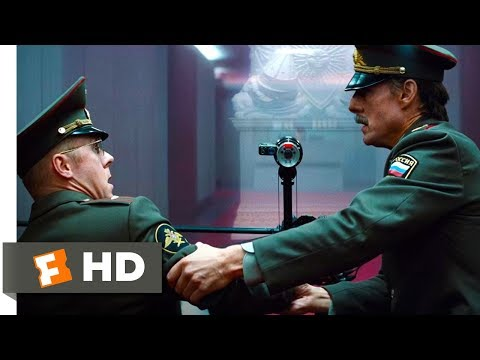

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('7DkV8WE7DFA')

In summary, we are going to create the illusion of 3D by changing what the user sees on a computer screen depending upon where their face is (using face tracking). It is important to recognize that the perception of 3D-ness requires the user moving, it is not created by giving each eye a different image (i.e. the way most 3D displays work).  Recall that we saw a similar effect when we covered *wiggle 3D* animated gifs:
![](https://fuzzywobble.com/images/fuzzy_wobble_wizard_gif_2.gif)
![](https://cdnb.artstation.com/p/assets/images/images/024/841/051/original/mengo-fedorov-forest-snow-parallax.gif)

Similarly, recall the pytorch Ken Burn's effect notebook we studied which makes static images become more immersive by adding a parallax shift to different layers with an anticipated depth. (see [notebook](https://github.com/taylan-sen/CIS490b_computer_vision/blob/main/CV_3D_Ken_Burns_multiple.ipynb))  

In the video below, Johnny Lee gives a good explanation of the way our code will work but by using a wiimote instead of facedetection tracking.

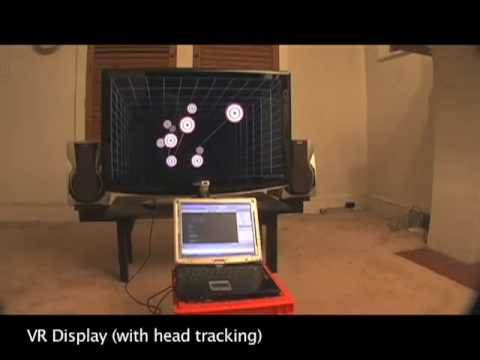

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Jd3-eiid-Uw')

# The Problem

* Given the physical tunnel, screen, and user layout shown, properly display/draw on the screen the tunnel rectangles according to the user's perspective. In other words, if the screen was a transparent sheet of paper, the tunnel rectangles drawn should line up exactly with the rectangles in real life.  

* The OpenCV Haar Cascade filter that we learned about should be used for face tracking.  

* In addition to the tunnel rectangles, you should draw 4 circular targets or balls at 4 different positions in the "real space". At least one of the targets should be in front of the screen, at least one in the tunnel, and at least one between the tunnel and screen.

* You must use github.com.
  * If you haven't already, sign up for a free account at github.com.
  * Create a **private** repository (name it computer_vision_projects or something else up to you), during the creation process make sure it has a README file
  * Add taylan-sen as a collaborator (under repository settings).
  * You must have at least three commits during your project development.

* Code organization:
  * You should have two main classes:  
    * *FaceFinder* (for setting up the face detector and providing methods for finding face bounding box from a frame)
    * *Game* (the main class, responsible for running game loop, managing the FaceFinder, and updating the screen display.

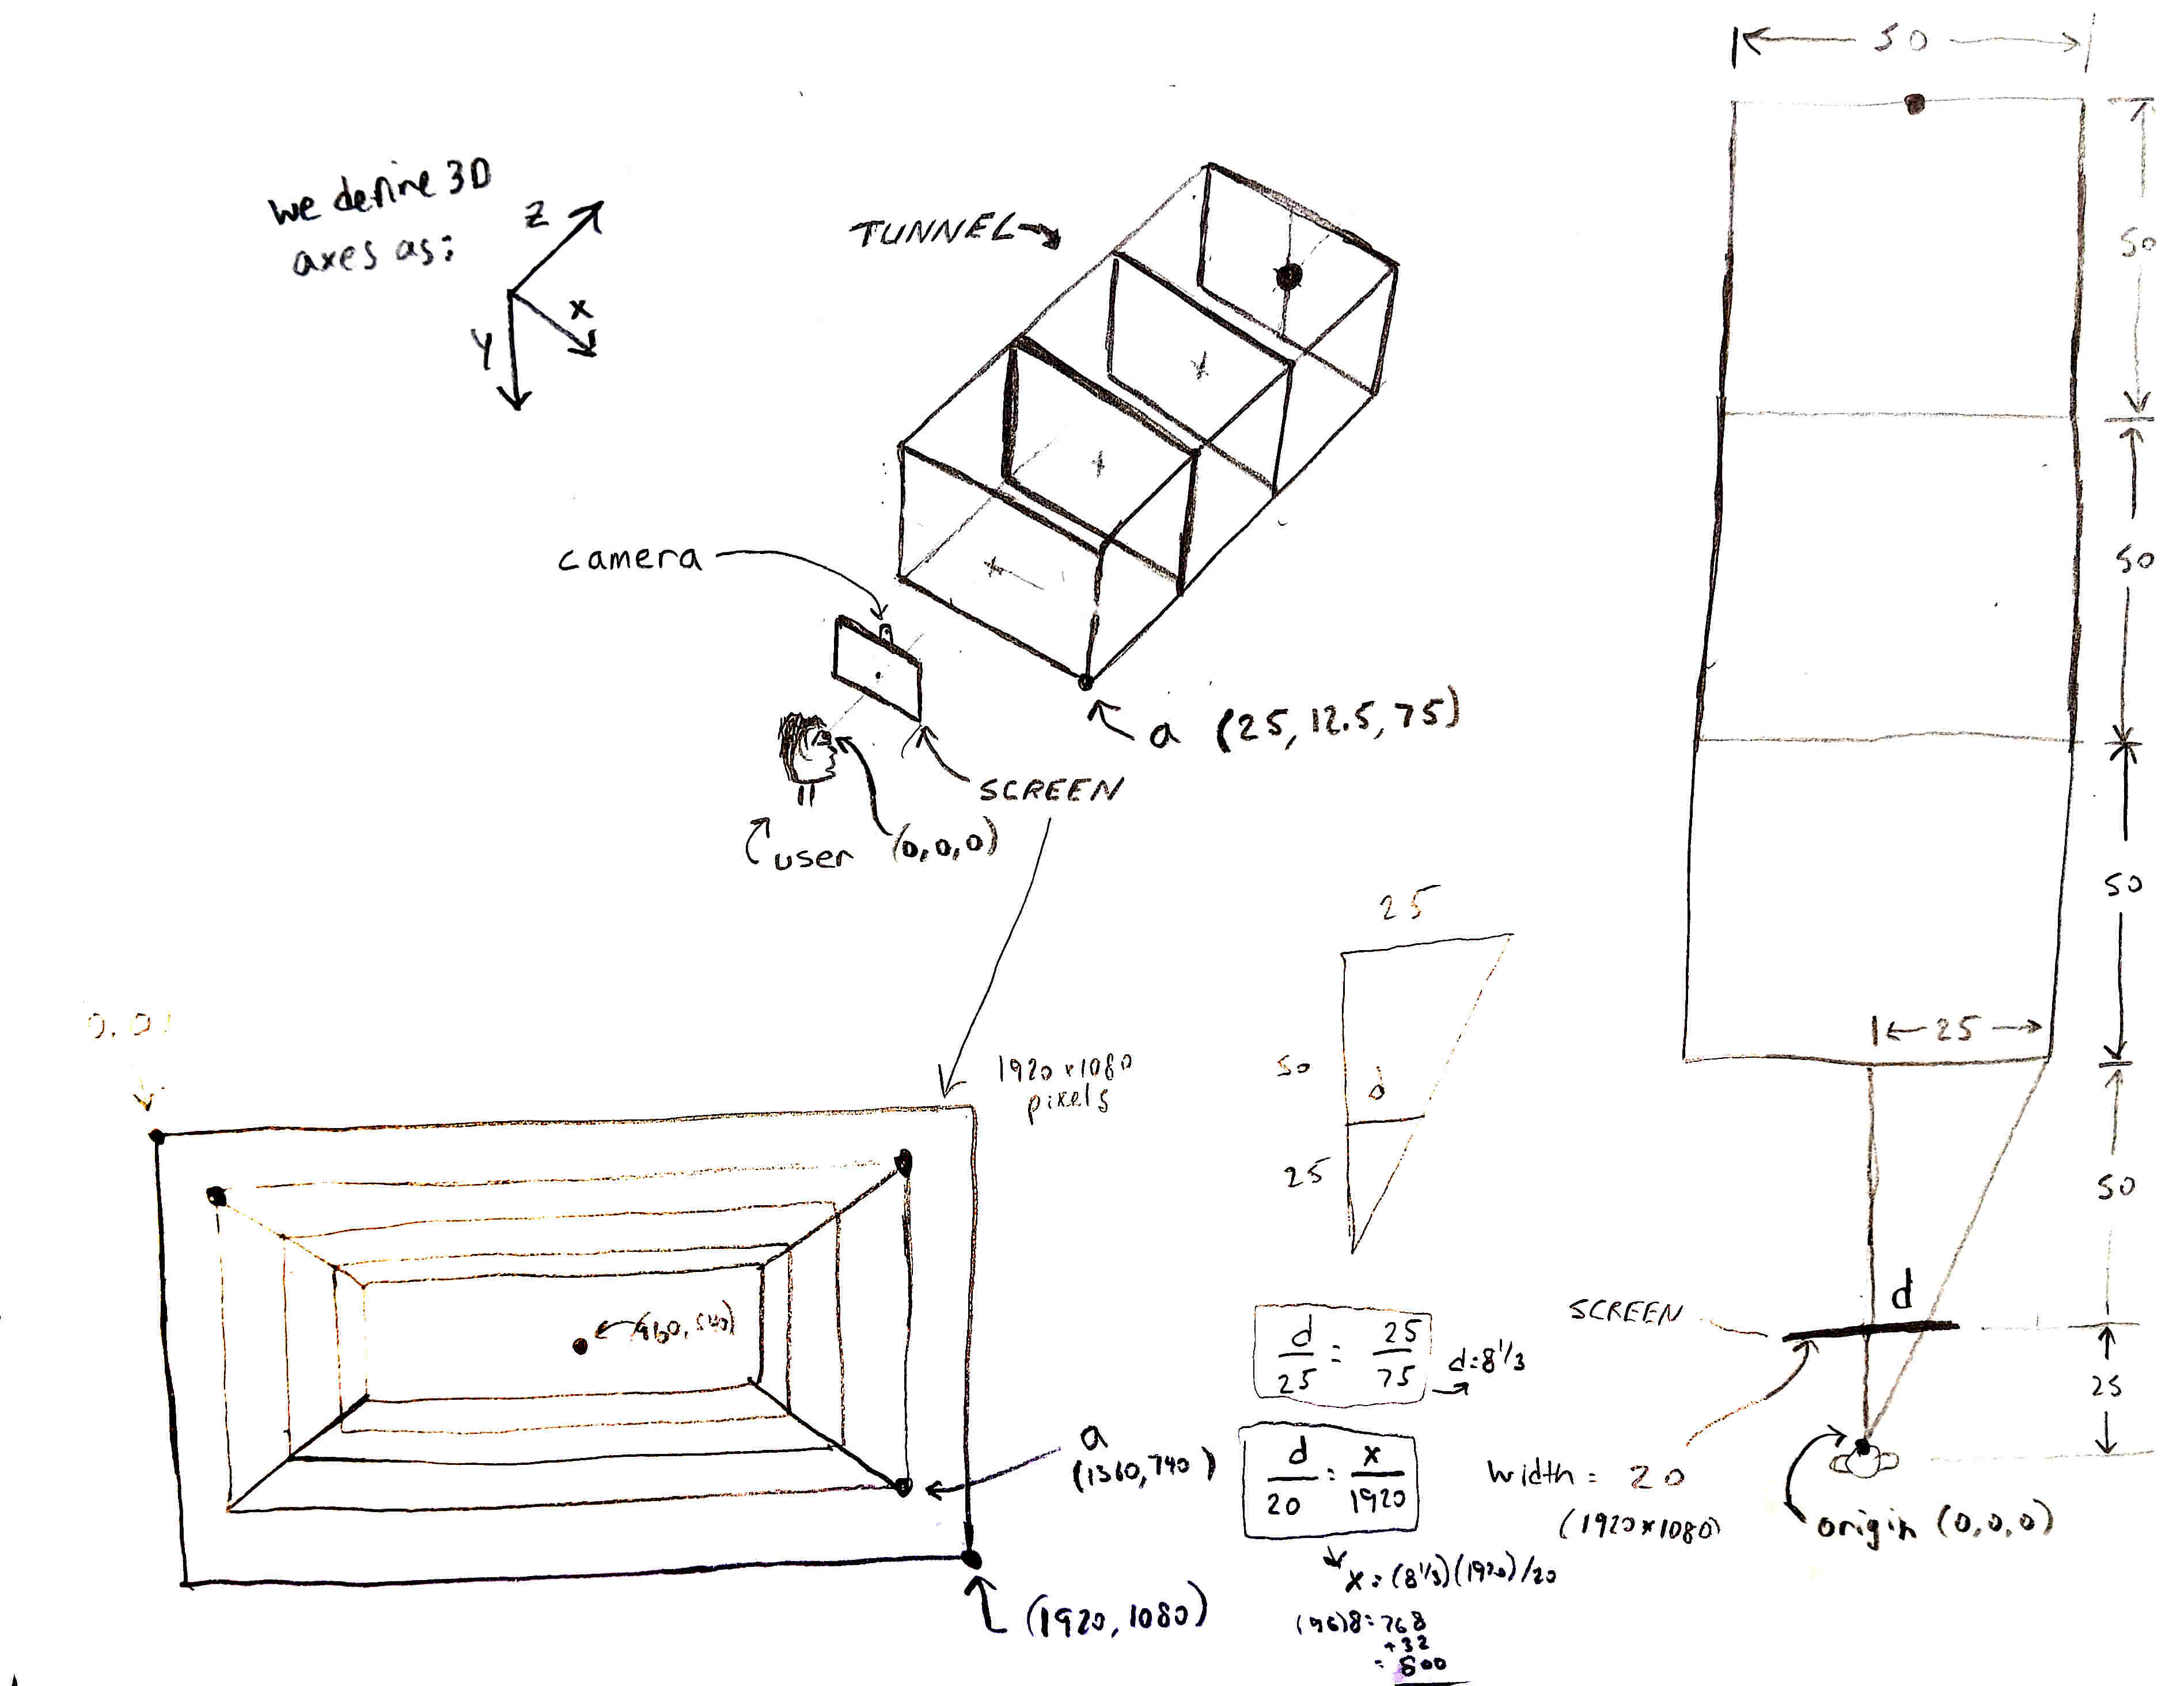

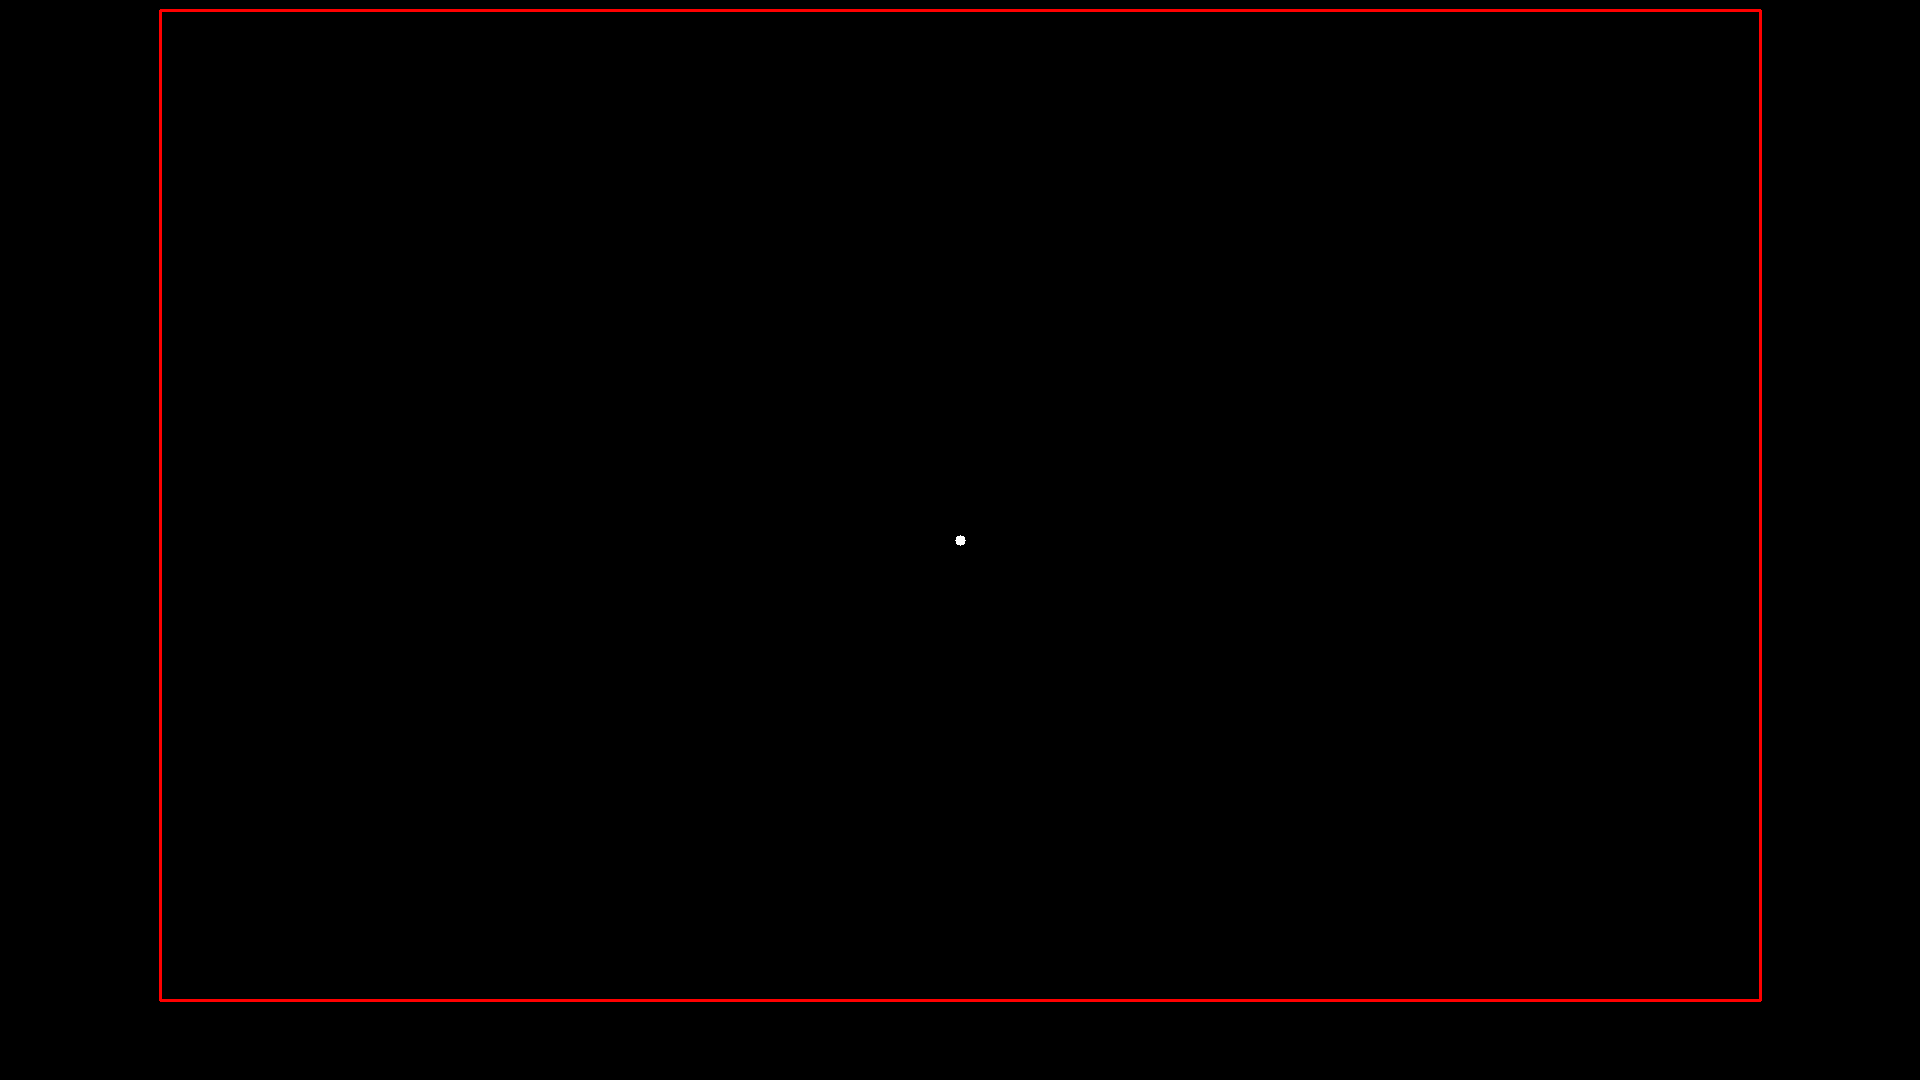

game over
1760.0 990.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

class Game:
  def __init__(self):
    # CONSTANTS
    self.SCREEN_WIDTH = 20
    self.SCREEN_HEIGHT = 10
    self.SCREEN_PIXEL_WIDTH = 1920
    self.SCREEN_PIXEL_HEIGHT = 1080
    self.DIST_USER_TO_SCREEN = 25 # distance from the screen
    self.DIST_SCREEN_TO_TUNNEL = 50
    self.TUNNEL_WIDTH = 50
    self.TUNNEL_HEIGHT = 25

    # TUNNEL - four rectangles:
    #RECT0 = [[],[]]                       # [[top left ],[bottom right]]
    self.RECT0 = ((-25,-12.5,75),(25,12.5,75))   # [[x,y,z],[x,y,z]]
    self.RECT1 = ((-25,-12.5,125),(25,12.5,125))
    self.RECT2 = ((-25,-12.5,175),(25,12.5,175))
    self.RECT3 = ((-25,-12.5,225),(25,12.5,225))

    self.LINE0 = ((-25,-12.5,75),(-25,-12.5,225))
    self.LINE1 = ((25,12.5,75),(25,12.5,225))
    self.LINE2 = ((-25,12.5,75),(-25,12.5,225))
    self.LINE3 = ((25,-12.5,75),(25,-12.5,225))

    # the frame variable will hold our display pixels
    self.frame = np.zeros([self.SCREEN_PIXEL_HEIGHT,
                          self.SCREEN_PIXEL_WIDTH,
                          3])                         # three colors
  def threeD2twoD(s, xyz):
    """Maps a 3d point to 2d screen. Assumes user is at (0,0,0).
    EXAMPLE: (25,12.5,75) --> (row,col)
    """
    obj_x, obj_y, obj_z = xyz
    screen_z = s.DIST_USER_TO_SCREEN
    #  screen_x    obj_x
    #  -------- = ----------
    #  screen_z    obj_z

    screen_x = obj_x * screen_z / obj_z
    screen_x_px = (1920/20)* screen_x
    row = 1920/2 + screen_x_px

    #  screen_y    obj_y
    #  -------- = ----------
    #  screen_z    obj_z

    screen_y = obj_y * screen_z / obj_z
    screen_y_px = (1080/10)* screen_y
    col = 1080/2 + screen_y_px

    return (row,col)

  def draw_rectangle(self):
    pass

  def display_tunnel(self):
    """ Draw the four rectangles for tunnel """

    # first draw a circle in the center of the screen as a "vanishing point"
    cv2.circle(self.frame,
               (960,540),      # center point
               5,              # radius
               (255,255,255),  # color
               -1)             # line thickness, -1 for fill

    cv2.rectangle(self.frame,
                  (160,10),     # top left
                  (1760,1000),  # bottom right
                  (0,0,255),    # color
                  2)            # line thickness

  def start_loop(self):
    """Runs a while loop """
    while True:
      # get face position


      # zero frame
      self.frame = np.zeros([self.SCREEN_PIXEL_HEIGHT,
                            self.SCREEN_PIXEL_WIDTH,
                            3])                         # three colors

      # draw tunnel from user's perspective
      self.display_tunnel()

      # temp code start-------------
      cv2_imshow(self.frame)
      break
      # temp code stop--------------

      #cv2.imshow(self.frame)
      #if cv2.waitKey(1) == ord('q'):
      #  break

    print('game over')


my_game = Game()
my_game.start_loop()
row, col = my_game.threeD2twoD((25,12.5,75))
print(row,col)

In [ ]:
# needed width
1920*16.667/20

1600.0320000000002

Next add a member function which converts 3D coordinates (x,y,z) to 2d screen coordinates (row, col on a 1920x1080 screen) when the user is centered at the position shown in the scene layout schmatic figure above.

    def convert2dto3d(self, 3d_coord):
      """ given x,y,z = 3d_coord, returns (row,col) """

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

class Game:
  def __init__(self):
    # CONSTANTS
    self.SCREEN_WIDTH = 20
    self.SCREEN_HEIGHT = 10
    self.SCREEN_PIXEL_WIDTH = 1920
    self.SCREEN_PIXEL_HEIGHT = 1080
    self.DIST_USER_TO_SCREEN = 25 # distance from the screen
    #self.DIST_SCREEN_TO_TUNNEL = 50
    #self.TUNNEL_WIDTH = 50
    #self.TUNNEL_HEIGHT = 25

    # TUNNEL RECTS
    self.RECT0 = [[-25,-12.5,75],[25,12.5,75]]
    self.RECT1 = [[-25,-12.5,125],[25,12.5,125]]
    self.RECT2 = [[-25,-12.5,175],[25,12.5,175]]
    self.RECT3 = [[-25,-12.5,225],[25,12.5,225]]

    # the frame variable will hold our display pixels
    self.frame = np.zeros([self.SCREEN_PIXEL_HEIGHT,
                          self.SCREEN_PIXEL_WIDTH,
                          3])                         # three colors

    self.user_xyz = [0,0,0] # [x,y,z]

  def draw_rectangle(self):
    pass

  def 2dto3d(self, xyz):
    """Given the 3d position x,y,z, return the screen (row,col)
    in pixels that a user at [0,0,0] sees.
    Example: [25,12.5,75]--> [1720,740]"""
    object_x, object_y, object_z = xyz
    screen_z = self.DIST_USER_TO_SCREEN
    # x,z --> row
    #
    # screen_x    object_x
    # -------- = ----------
    # screen_z    object_z
    screen_x = object_x * screen_z / object_z
    screen_x_px = self.SCREEN_PIXEL_WIDTH/2 +
    return (row,col)

  def display_tunnel(self):
    """ Draw the four rectangles for tunnel """
    pass

    # first draw a circle in the center of the screen as a "vanishing point"
    cv2.circle(self.frame,
               (960,540),      # center point
               5,              # radius
               (255,255,255),  # color
               -1)             # line thickness, -1 for fill

    cv2.rectangle(self.frame,
                  (160,10),     # top left
                  (1760,1000),  # bottom right
                  (0,0,255),    # color
                  2)            # line thickness

  def start_loop(self):
    """Runs a while loop """
    while True:
      # get face position


      # zero frame
      self.frame = np.zeros([self.SCREEN_PIXEL_HEIGHT,
                            self.SCREEN_PIXEL_WIDTH,
                            3])                         # three colors

      # draw tunnel from user's perspective
      self.display_tunnel()

      # temp code start-------------
      cv2_imshow(self.frame)
      break
      # temp code stop--------------

      #cv2.imshow(self.frame)
      #if cv2.waitKey(1) == ord('q'):
      #  break

    print('game over')


my_game = Game()
my_game.start_loop()
